<center>

## ENSE 350 – Math Programming for Software Engineers - Laboratory

# Lab 6: Numerical Integration

### University of Regina
### Faculty of Engineering and Applied Science - Software Systems Engineering
### Lab Instructor: [Adam Tilson](mailto:Adam.Tilson@uregina.ca)

</center>

### Your Name: Aryan Chandra
### Student ID: 200461690

### Objective:

In this lab we will look at performing numerical integration on polynomials using the Midpoint Rule, the Trapezoid Rule and Simpson's Rule. We will use a modified Polynomial class from Lab 3, removing functions for finding roots and derivatives, adding functions for approximating definite integrals, as well as computing them from a symbolic integration. We will benchmark our algorithms in terms of speed and precision, using the absolute relative percent error formula. Finally, we will apply what we learned to solving a real world engineering kinematics system design problem.

### 1. Introduction to Numerical Integration

Let's examine the fourth order polynomial given by the equation:

$$ f(x) = -\frac{1}{2}x^4 + 3x^2 + x + 1 $$

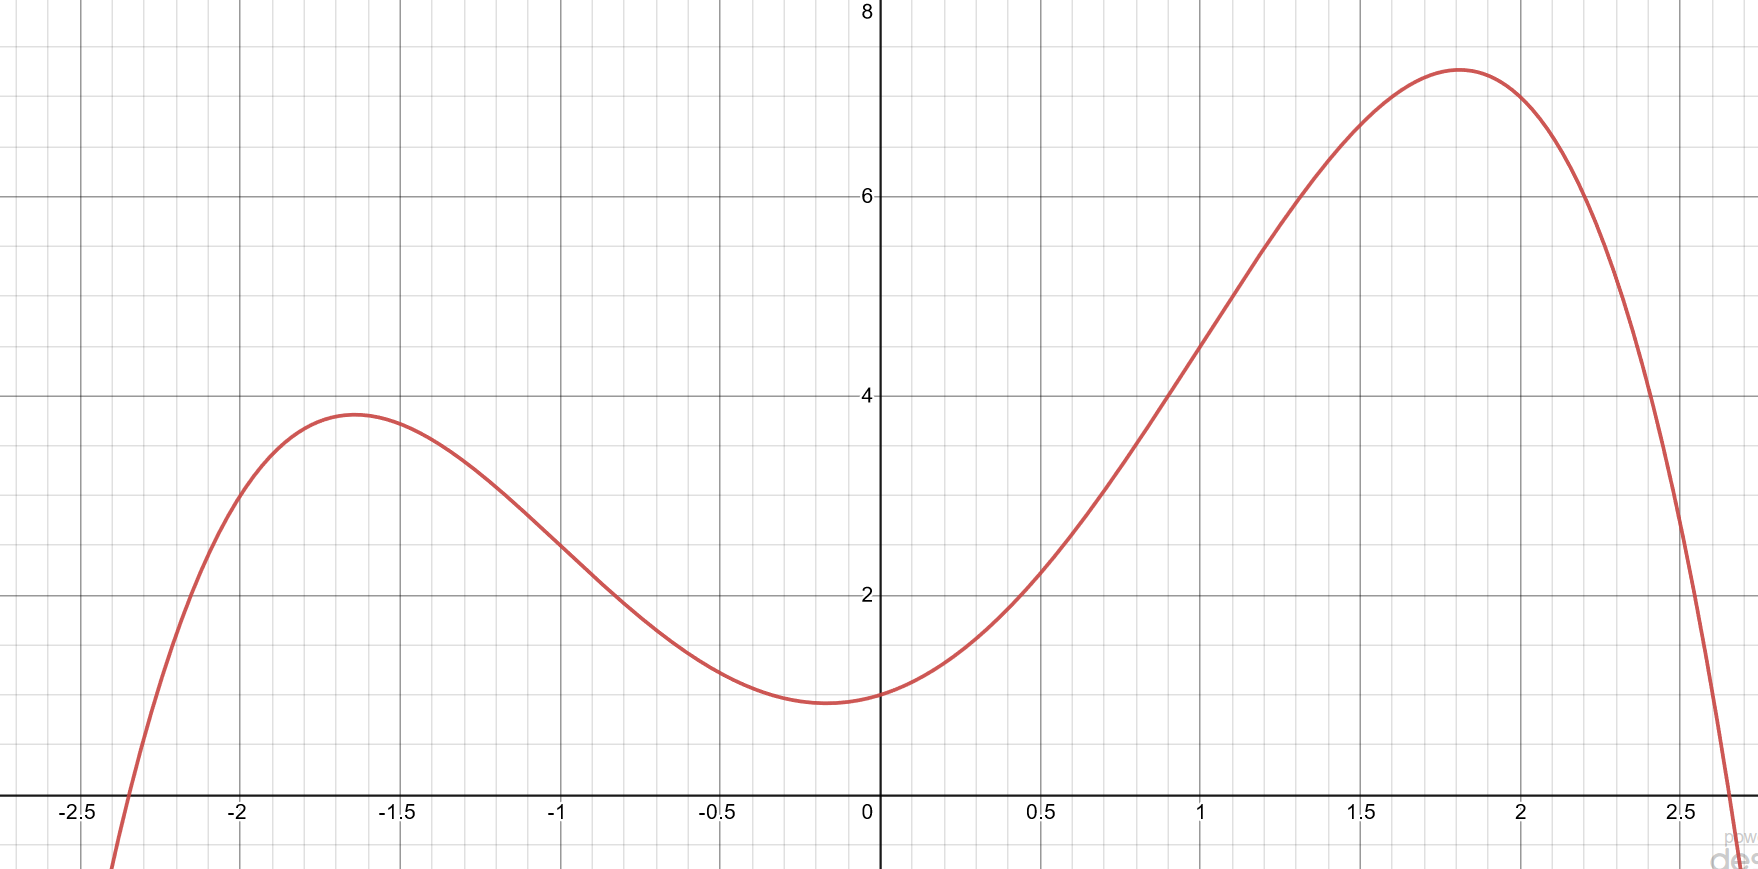



And we need to take the integral from -2 to 2

$$ \int_{-2}^{2} -\frac{1}{2}x^4 + 3x^2 + x + 1 \,dx $$

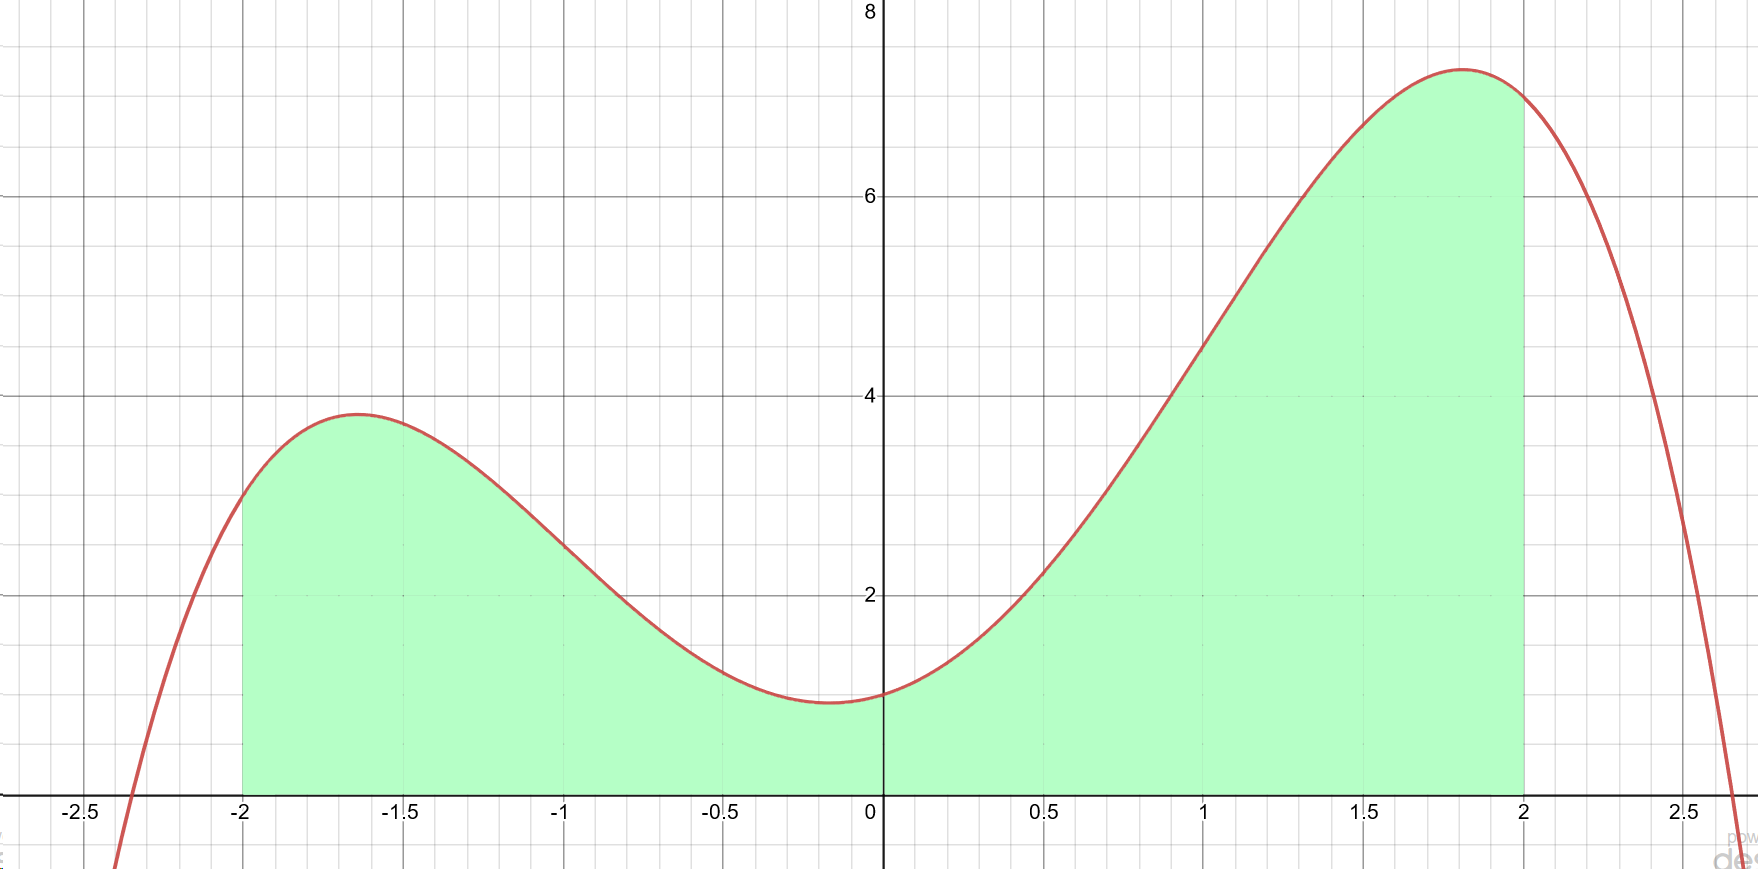

We can solve this symbolically by first taking the symbolic integral...

$$ = -\frac{1}{10}x^5 + x^3 + \frac{1}{2}x^2 + x + c $$


$$ = \left( -\frac{1}{10}x^5 + x^3 + \frac{1}{2}x^2 + x \right) \Bigr\rvert_{x = 2} - \left( -\frac{1}{10}x^5 + x^3 + \frac{1}{2}x^2 + x \right) \Bigr\rvert_{x = -2} $$

$$ = \left( -\frac{1}{10}(2)^5 + (2)^3 + \frac{1}{2}(2)^2 + (2) \right)  - \left( -\frac{1}{10}(-2)^5 + (-2)^3 + \frac{1}{2}(-2)^2 + (-2) \right) $$

$$ = \left( -\frac{32}{10} + 8 + \frac{4}{2} + 2 \right)  - \left( \frac{32}{10} + (-8) + \frac{4}{2} + (-2) \right) $$

$$ = -\frac{32}{10} + 8 + \frac{4}{2} + 2  - \frac{32}{10} + 8 - \frac{4}{2} + 2 $$

$$ = -3.2 + 8 + 2  -3.2 + 8 + 2 $$
$$ = 13.6 $$

For polynomials, this method of taking of the definite integral can be symbolically computed and evaluated by computers, much like we did with derivatives in the third lab. We will use this to check our work. However, for functions more complicated than polynomials, this method may be non-trivial. For this reason, we look to numerical integration, a family of algorithms for approximating the value of a definite integral. These methods rely on approximating the area under the curve as a sum of primitive geometric objects, such as rectangles or trapezoids, called Riemann Sums.

### 2.0 Midpoint Rule

The midpoint rule approximates the area under the curve with a rectangle. The width of the rectangle are the boundaries of the integral, and the height is computed from the function value at a midpoint between two boundaries. We can make successively better approximations by dividing the integral into increasingly small segments, and taking the sum of all of these rectangles.

The rectangle area is given by the formula:

$$ \text{Area} = (b-a) * f\left( \frac{b-a}{2}\right) $$

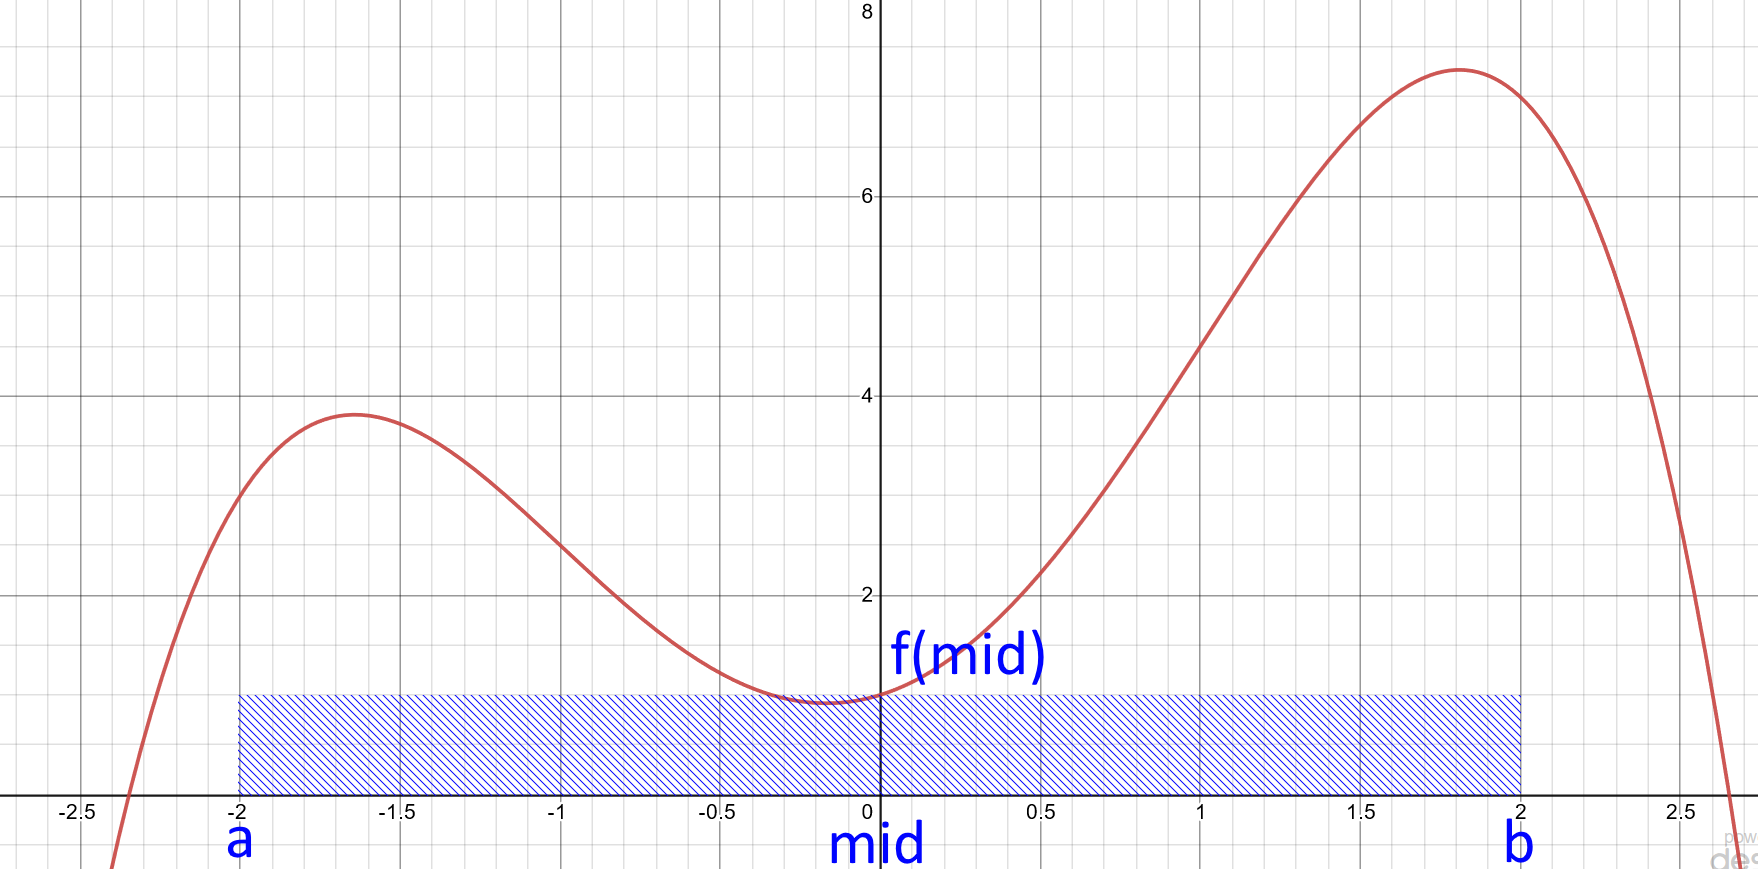

Visually, we can see this is not a great approximation. We can do better, but for now, let's compute the value using the formula:

$$ \text{Area} = (2 - (-2)) * f \left( \frac{2 + (-2)}{2}\right)$$
$$ = 4 * f (0)$$
$$ = 4 * 1 $$
$$ = 4 $$

Not a terribly good approximation. We can do better By dividing the space between into more segments.

Let's precompute some of the x values and function values we will need...

x | f(x)
---|---
-2|3
-1.5|3.71875
-1|2.5
-0.5|1.21875
0|1
.5|2.21875
1|4.5
1.5|6.71875
2|7

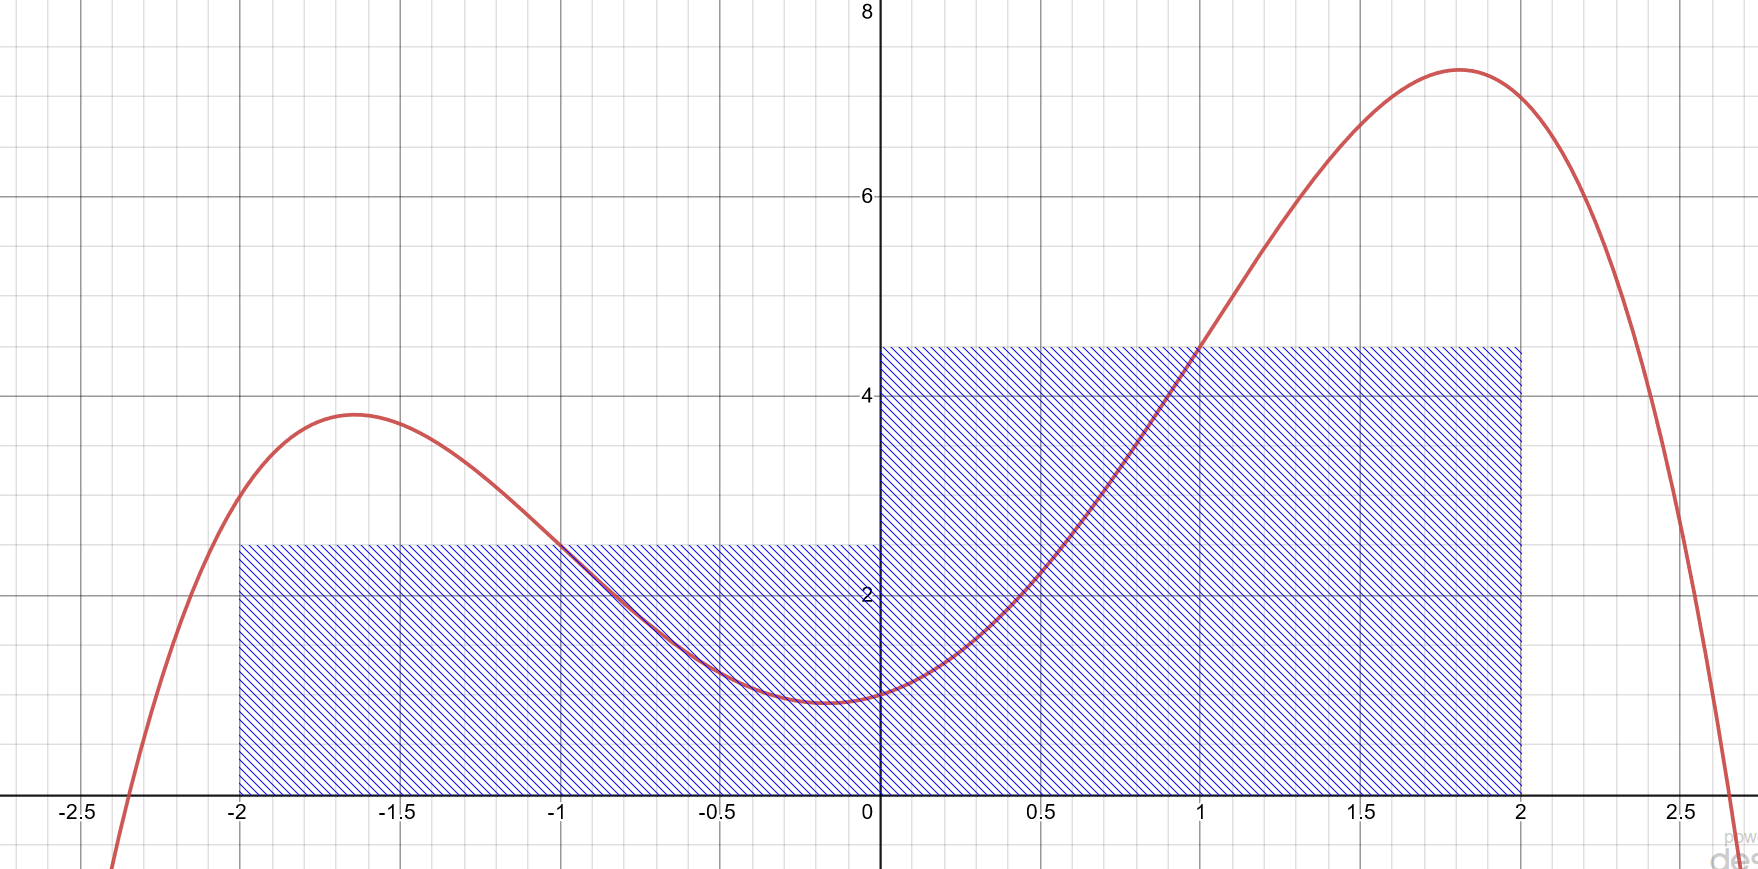

We need to now sum together all of the contributions from all of these components:

$$ \text{Area} = (0 - (-2)) * f \left( \frac{0 + (-2)}{2} \right) + (2 - 0) * f \left( \frac{2 + (2)}{2} \right) $$
$$ = 2 * f (-1) + 2 f(1) $$
$$ = 2 * 2.5 + 2 * 4.5 $$
$$ = 5 + 9 $$
$$ = 14 $$

This is a much better approximation already. But we can make it better by continuing to diving into smaller segments.

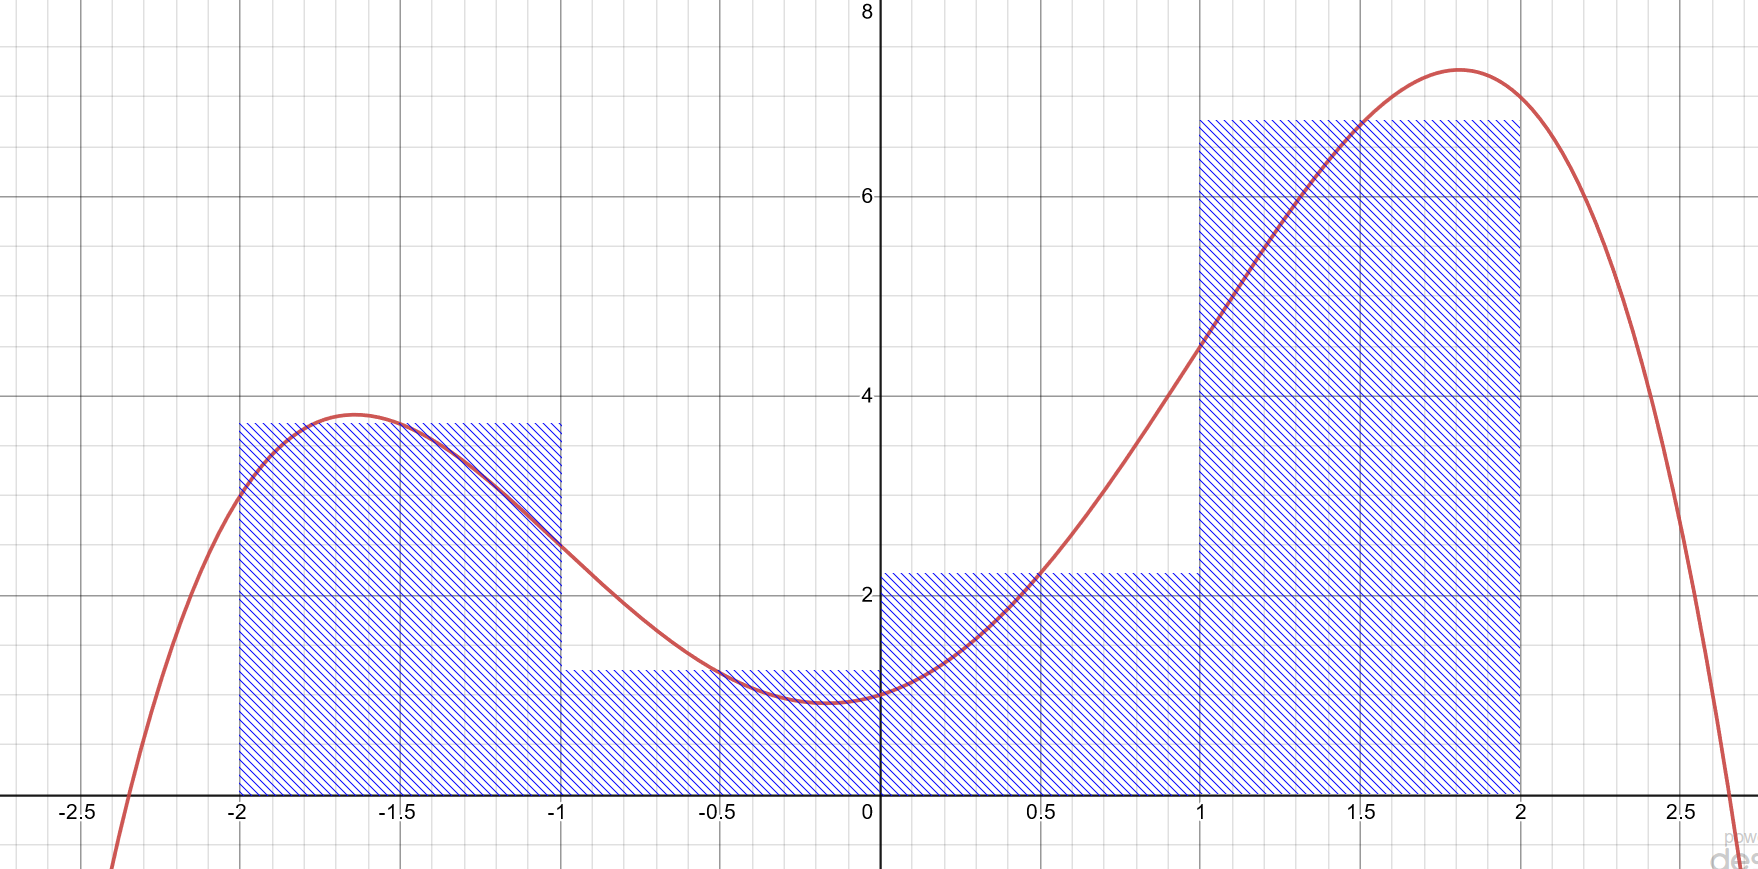


$$ \text{Area} = (-1 - (-2)) * f \left( \frac{-1 + (-2)}{2}\right) + (0 - (-1)) * f \left( \frac{0 + (-1)}{2}\right) + (1 - 0) * f \left( \frac{1 + 0}{2}\right) + (2 - 1) * f \left( \frac{2 + 1}{2}\right) $$
$$ = 1 * f (-1.5) + 1 * f (-0.5) + 1 * f (.5) + 1 * f (1.5) $$
$$ = 3.71875 + 1.21875 + 2.21875 + 6.71875$$
$$13.875$$

Getting very close!

We can think of a generalized formula for this system in terms of N segments, such that:

$$ \text{Area} = \sum_{i=0}^{N-1} (x_{i+1}-x_i)*f\left(\frac{x_{i+1}+x_i}{2}\right) $$

As the widths of each area are consistent, we may factor this out...

$$ \text{Area} = \Delta x \sum_{i=0}^{N-1} f\left(\frac{x_{i+1}+x_i}{2}\right) $$

We may compute the percentage error from the actual integral using the formula:

$$ \epsilon_a = \displaystyle\left\lvert\frac{A_{approximated} - A_{actual}}{A_{actual}}\right\rvert \times 100\% $$

For example, for the value we currently have:

$$ \epsilon_a = \displaystyle\left\lvert\frac{A_{approximated} - A_{actual}}{A_{actual}}\right\rvert \times 100\% $$

$$ \epsilon_a = \displaystyle\left\lvert\frac{13.875 - 13.6}{13.6}\right\rvert \times 100\% $$

$$ \epsilon_a =  2.02 \% $$

The following snapshots were computed using using my implementation of the midpoint rule, and a python plotting library, matplotlib, to show how successive approximations improve the estimates accuracy:

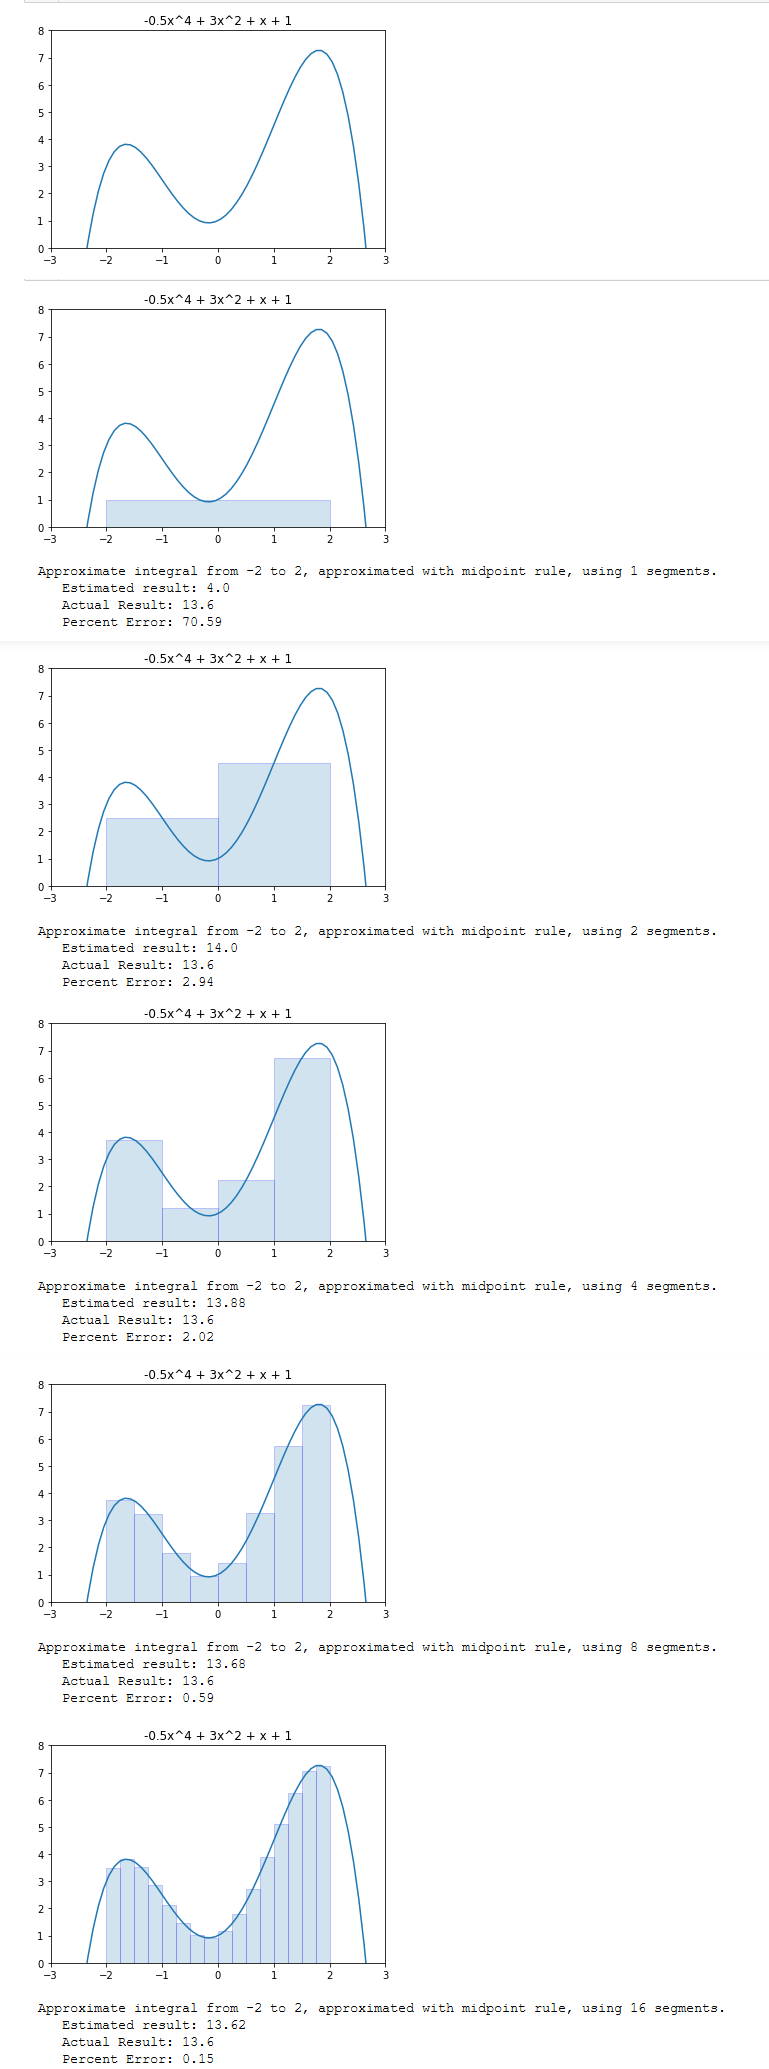

### 3.0 Trapezoid Rule

One of the problems with our current estimation is that top of the rectangle is flat, and we know functions often have a slope. If we could attach a slope to the top of our rectangle, we may be able to increase the quality of our estimate in some situations. This prompts the use of the Trapezoid rule, which attempts to fit a trapezoid in the place of the rectangle in the midpoint rule:

Consider the same integral, from -2 to 2...

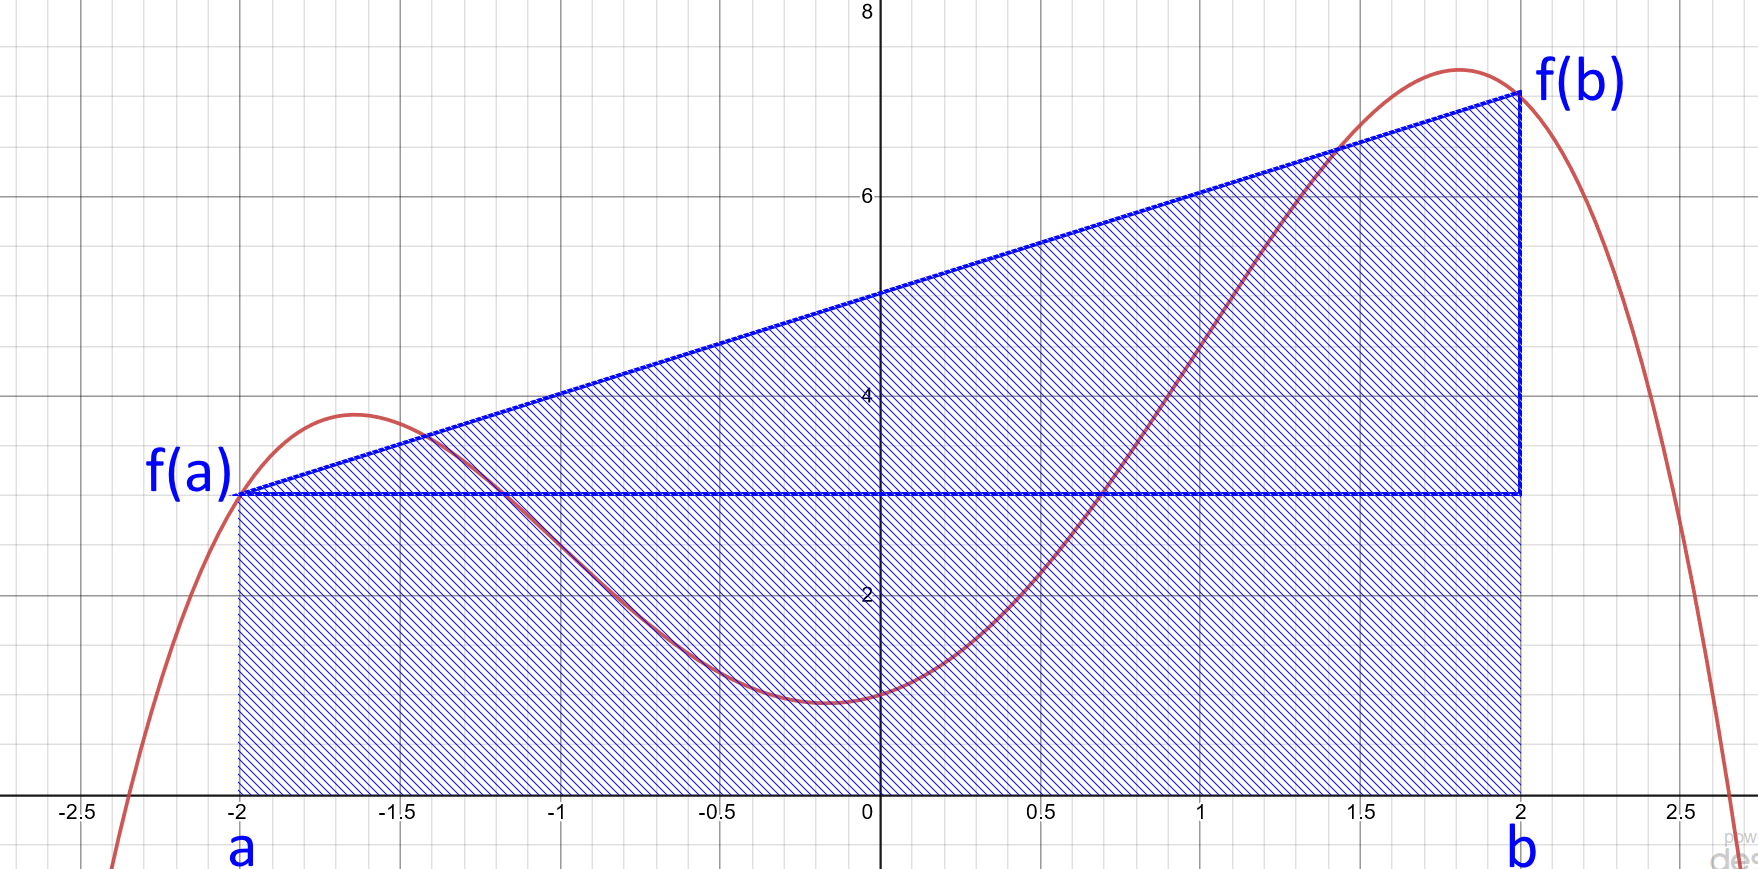

Using some geometry, we can compute the area under the trapezoid, by summing the rectangle plus the triangle...

$$ \text{Area} = (b-a) * f(a) + \frac{(b-a) * (f(b) - f(a))}{2} $$

Doing some algebra...

$$ \text{Area} = (b-a) * f(a) + \frac{(b-a) * f(b)}{2} - \frac{(b-a) * f(a))}{2} $$

$$ \text{Area} = \frac{(b-a) * f(b)}{2} + \frac{(b-a) * f(a))}{2} $$

$$ \text{Area} = (b-a) * \frac{ f(b) + f(a)}{2} $$

As before, this can be generalized for N segments as follows:

$$ \text{Area} = \sum_{i=0}^{N-1} (x_{i+1}-x_i) * \frac{ f(x_{i+1}) + f(x_i)}{2} $$

As with the midpoint formula, since the widths of each trapezoid is consistent, we may factor this out...

$$ \text{Area} = \Delta x \sum_{i=0}^{N-1} \frac{ f(x_{i+1}) + f(x_i)}{2} $$


Let's compute by hand for N=1 and N=2...

$$ \text{Area} = \sum_{i=0}^{N-1} (x_{i+1}-x_i) * \frac{ f(x_{i+1}) + f(x_i)}{2} $$

$$ \text{Area} = (2-(-2)) * \frac{ f(2) + f(-2)}{2} $$

$$ \text{Area} = 4 * \frac{ 3 + 7}{2} $$

$$ \text{Area} = 4 * 5 $$

$$ \text{Area} = 20 $$

Again, not ideal... A bit high because the single trapezoid doesn't account for the cutout bit in the middle. Let's try N=2...

N=2
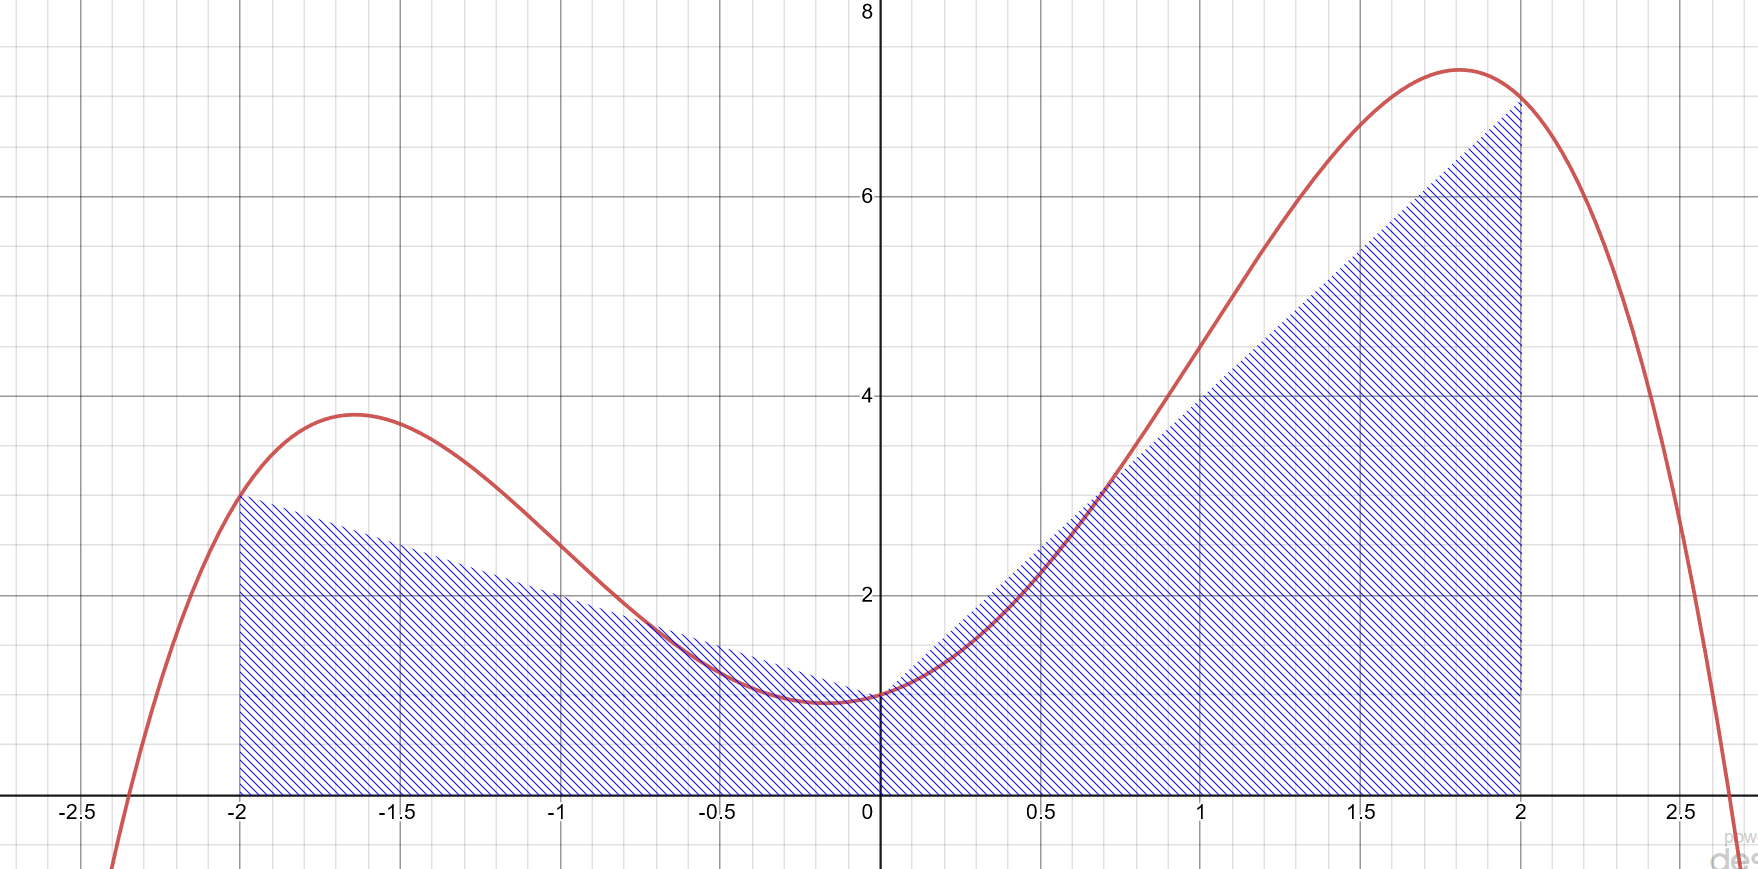

$$ \text{Area} = \sum_{i=0}^{N-1} (x_{i+1}-x_i) * \frac{ f(x_{i+1}) + f(x_i)}{2} $$

$$ \text{Area} =(0-(-2)) * \frac{ f(0) + f(-2)}{2} + (2-(0)) * \frac{ f(2) + f(0)}{2}$$

$$ \text{Area} =2 * \frac{ 1 + 3}{2} + 2 * \frac{ 7 + 1}{2}$$

$$ \text{Area} =2 * \frac{ 4}{2} + 2 * \frac{ 8}{2}$$

$$ \text{Area} = 12$$

Doing much better! Again, rather than do any more by hand, let's look at some computer generated iterations:

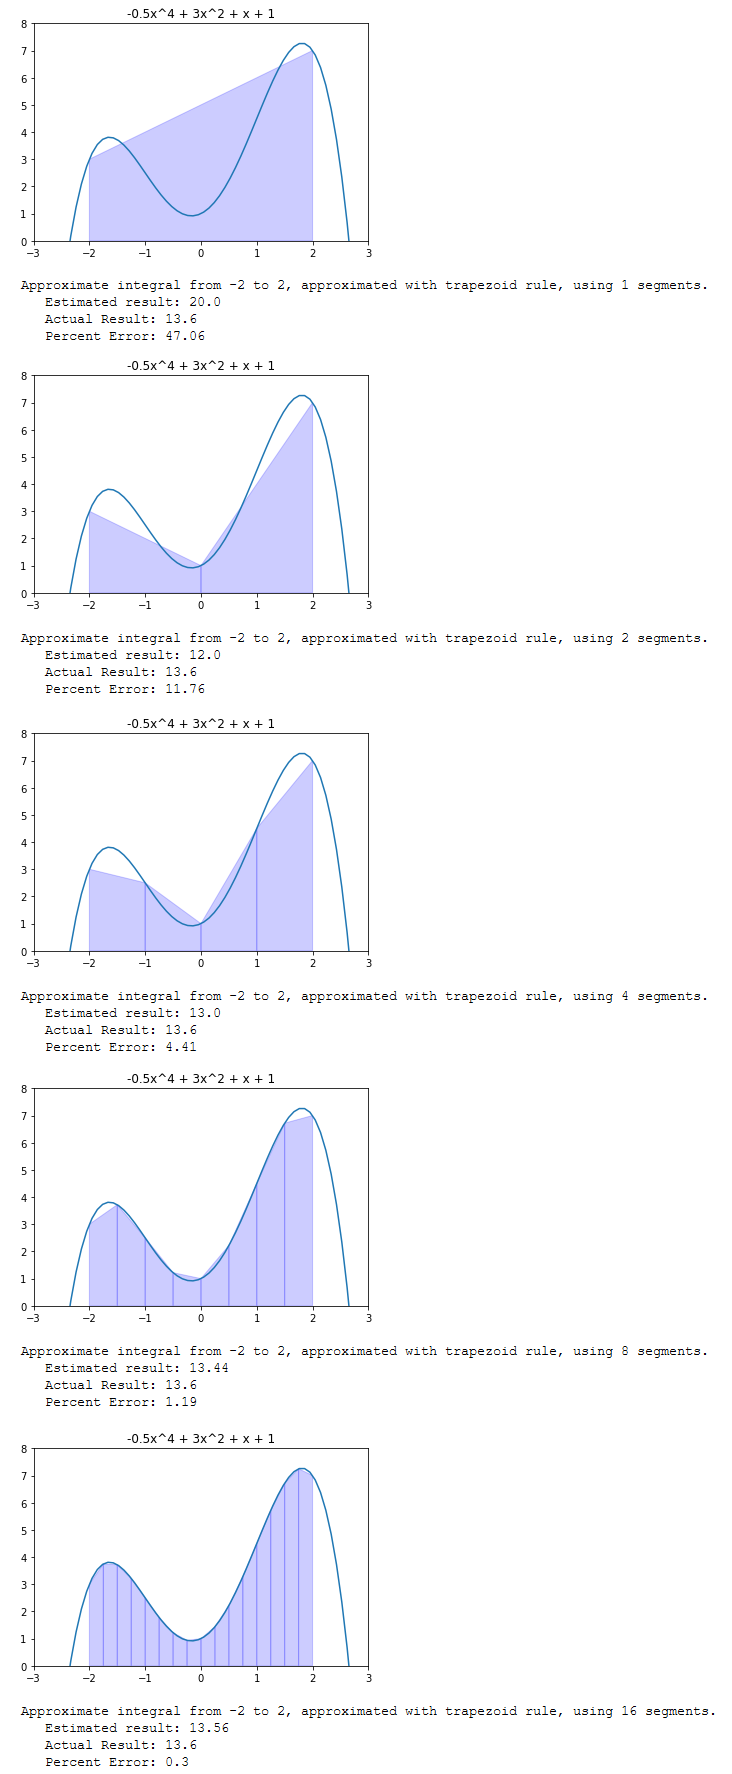

### 4.0 Simpsons Rule

The final method we will discuss is Simpsons Rule. This method is similar to the Trapezoid rule, except that a parabola is fit to the top of the rectangle rather than a slope, such that it passes through the two endpoints of the region as well as the midpoint. We won't derive this one (because I've never actual done it, though I've heard there are several cool ways to do it), and just start from the general form of the equation:

$$ \text{Area} = \sum_{i=0}^{N-1} \frac{(x_{i+1}-x_i)}{6} * \left( f(x_i) + 4*f \left( \frac{x_i+x_{i+1}}{2} \right) + f(x_{i+1}) \right) $$

$$ \text{Area} = \frac{\Delta x}{6} * \sum_{i=0}^{N-1} \left( f(x_i) + 4*f \left( \frac{x_i+x_{i+1}}{2} \right) + f(x_{i+1}) \right) $$

NB1: I modified this slightly to make it easier to implement using your existing code. We are going to fit a parabola over each interval using the midpoint. Typically in Simpsons rule, a parabola is instead fit over two adjacent intervals, making this method only work for even numbers of segments, and changing the division from over 6 to over 3. For now, don't worry about this, but just a word of caution in case you cover this in the course / if you look for help online.

As before, here is the expected behaviour for our implementation of Simpson's rule:
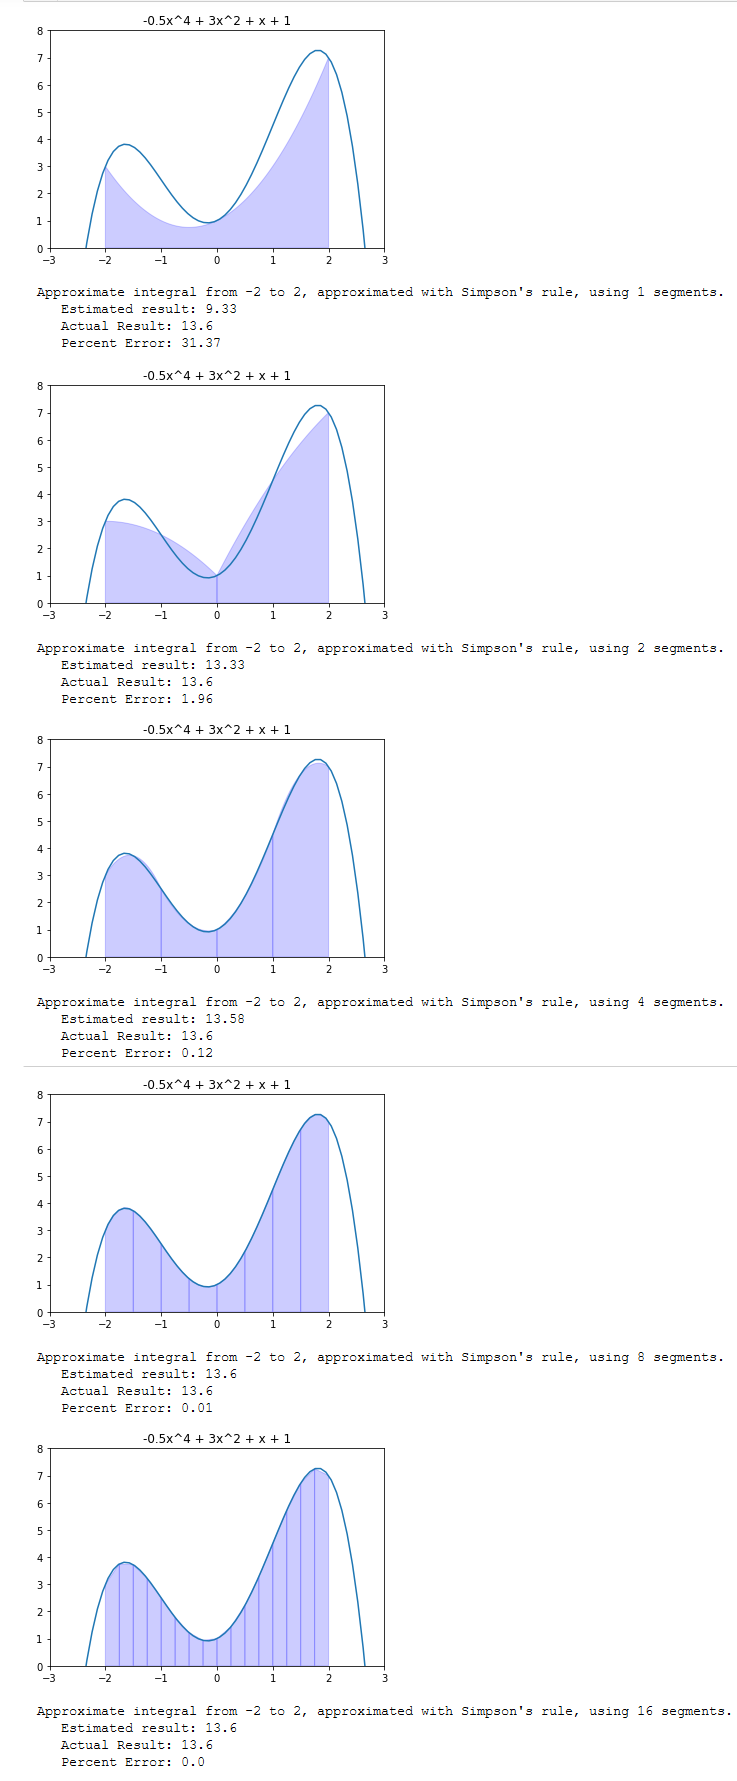

### Part 5: Polynomial Class with Numerical Integration Methods

In this section we will define a polynomial class. An instance of this class represents a polynomial of the form

$$ Ax^n + Bx^{n-1} + ... + Yx + Z $$

We will create this using a constructor which takes a list of coefficients. This syntax may seem familiar if you have ever used MATLAB or Octave. Please see the doctests for expected usage and output.

The class will have the following public functions:

|polynomial|
|:--- |
|+ \_\_init\_\_ (self, list_of_coefficients)|
|+ print_polynomial(self)|
|+ print_first_integral(self)|
|+ compute (self, x)|
|+ compute_definite_integral (self, a, b)|
|+ approximate_definite_integral_midpoint (self, a, b, num_segments)|
|+ approximate_definite_integral_trapezoid (self, a, b, num_segments)|
|+ approximate_definite_integral_simpsons (self, a, b, num_segments)|
|+ get_error(self, approximate, actual)|

In [61]:
class Polynomial:
    """
    >>> poly = Polynomial([-3, 2, 0, -1])
    
    >>> poly.print_polynomial()
    -3x^3 + 2x^2 - 1

    >>> poly = Polynomial([230, 18, 9, -221, -9])
    
    >>> poly.print_polynomial()
    230x^4 + 18x^3 + 9x^2 - 221x - 9

    >>> poly.compute(3)
    18525
    
    >>> poly = Polynomial([3,4,5])
    
    >>> poly.print_polynomial()
    3x^2 + 4x + 5
    
    >>> poly.print_first_integral()
    x^3 + 2.0x^2 + 5.0x
    
    >>> print(poly.compute_definite_integral(2, 3))
    34.0
    
    >>> poly = Polynomial([-.5,0,3,1,1])
    >>> print(round(poly.compute_definite_integral(-2, 2),1))
    13.6
    
    >>> print (round(poly.approximate_definite_integral_midpoint (-2, 2, 1),2))
    4.0
    
    >>> print (round(poly.approximate_definite_integral_midpoint (-2, 2, 2),2))
    14.0
    
    >>> print (round(poly.approximate_definite_integral_midpoint (-2, 2, 4),2))
    13.88
    
    >>> print (round(poly.approximate_definite_integral_midpoint (-2, 2, 8),2))
    13.68
    
    >>> print (round(poly.approximate_definite_integral_trapezoid (-2, 2, 1),2))
    20.0
    
    >>> print (round(poly.approximate_definite_integral_trapezoid (-2, 2, 2),2))
    12.0
    
    >>> print (round(poly.approximate_definite_integral_trapezoid (-2, 2, 4),2))
    13.0
    
    >>> print (round(poly.approximate_definite_integral_trapezoid (-2, 2, 8),2))
    13.44
    
    >>> print (round(poly.approximate_definite_integral_simpsons (-2, 2, 1),2))
    9.33
    
    >>> print (round(poly.approximate_definite_integral_simpsons (-2, 2, 2),2))
    13.33
    
    >>> print (round(poly.approximate_definite_integral_simpsons (-2, 2, 4),2))
    13.58
    
    >>> print (round(poly.approximate_definite_integral_simpsons (-2, 2, 8),2))
    13.6
    
    """

    def __init__ (self, list_of_coefficients):
        # reverse the Polynomial so that the list index matches the order,
        # e.g. index 5 is the power of x^5
        # e.g. index 0 is the power of x^0, or the constant term
        list_of_coefficients.reverse()
        self.coefficients = list_of_coefficients
        self.first_integral_coefficients = self.__compute_integral_coefficients__ ()
    
    def __compute_integral_coefficients__ (self):
        ''' computes the symbolic integral coefficients. 
        Set zero for the constant term, as it is not needed in definite integrals '''
        first_integral_coefficients = [0]
        for order in range(len(self.coefficients)):
            first_integral_coefficients.append(self.coefficients[order]/(order+1))
        return first_integral_coefficients
    
    def __print_helper__(poly_coefficients):
        # Provided to help you debug your polynomials.
        
        # Accounts for...
        #    - missing terms
        #    - leading negative
        #    - correct sign
        #    - printing cx^1 as cx, and cx^0 as c
        #    - 1's / -1s only appear as constants
        #    - if you find anything wrong with it, let me know!
        
        def __print_sign_helper_first__ (coefficient):
            output = ""
            if coefficient < 0:
                output += "-"
            return output

        def __print_sign_helper__ (coefficient):
            output = ""
            if coefficient < 0:
                output += " - "
            else: 
                output += " + "
            return output

        def __print_coefficient_helper__ (coefficient, order):
            output = ""
            if order == 0 and (coefficient == 1 or coefficient == -1):
                output += "1"
            if coefficient != 1 and coefficient != -1:
                output += str(abs(coefficient))
            return output

        def __print_order_helper__ (order):
            output = ""
            if order == 1:
                output += "x"
            elif order > 1:
                output += "x^" + str(order)
            return output
        
        output = ""
        output += __print_sign_helper_first__(poly_coefficients[-1])
        output += __print_coefficient_helper__(poly_coefficients[-1], len(poly_coefficients)-1)
        output += __print_order_helper__(len(poly_coefficients)-1)
        
        for order in reversed(range(len(poly_coefficients)-1)):
            if poly_coefficients[order] != 0:
                output += __print_sign_helper__(poly_coefficients[order])
                output += __print_coefficient_helper__(poly_coefficients[order], order)
                output += __print_order_helper__(order)       
        print(output)
    
    def print_polynomial(self):
        Polynomial.__print_helper__(self.coefficients)
        
    def print_first_integral(self):
        Polynomial.__print_helper__(self.first_integral_coefficients)
    
    def __compute_helper__ (coefficients, x):
        accumulator = 0
        for order in range(len(coefficients)):
            accumulator += coefficients[order] * x ** order
        return accumulator        
    
    def compute (self, x):
        return Polynomial.__compute_helper__ (self.coefficients, x)
  
    def compute_definite_integral (self, a, b):
        ''' Invoke compute helper using your integral coefficients to compute
            a definite integral from a to b'''
        return Polynomial.__compute_helper__(self.first_integral_coefficients, b) - \
               Polynomial.__compute_helper__(self.first_integral_coefficients, a)

    def approximate_definite_integral_midpoint (self, a, b, num_segments):
        '''Approximate a definite integral from a to b with num_segments segments
        using the midpoint rule'''
        # Your code here!
        deltaX = (b - a) / num_segments

        sum = 0
        for i in range(num_segments):
            xMid = ((a + a + deltaX) / 2)
            sum += self.compute(xMid) * deltaX
            a = a + deltaX
        return sum
        pass
    
    def approximate_definite_integral_trapezoid (self, a, b, num_segments):
        '''Approximate a definite integral from a to b with num_segments segments
        using the trapezoid rule'''
        # Your code here!
        deltaX = (b - a) / num_segments

        sum = 0
        for i in range(num_segments):
            sum += ((self.compute(a + deltaX) + self.compute(a)) * deltaX) / 2
            a = a + deltaX
        return sum
        pass
    
    
    def approximate_definite_integral_simpsons (self, a, b, num_segments):
        '''Approximate a definite integral from a to b with num_segments segments
        using Simpson's rule'''
        # Your code here!
        deltaX = (b - a) / num_segments

        sum = 0
        for i in range(num_segments):
            xMid = ((a + a + deltaX) / 2)
            sum += (deltaX / 6) * ((self.compute(a) + (4 * self.compute(xMid) + self.compute(a + deltaX))))
            a = a + deltaX
        return sum
        pass
    
    def get_error (self, approximate, actual):
        '''Return the Absolute Relative Approximate Error between approximate and actual.
        Note - you cannot simply copy and paste your code from Lab 5, as this time
        we are directly computing the error between two values, 
        rather than evaluating the function at those values.'''
        # Your code here!
        error = (abs((approximate - actual) / actual) * 100)
        return error
        pass
        
import doctest
doctest.testmod()

TestResults(failed=0, attempted=23)

### Part 2: Comparison and Exploration

Run the following cell to create a polynomial object, and then run the following cells to compare the performance between the three methods to approximate the integral. Do the results meet your expectations? Why?

In [30]:
poly = Polynomial([1/100,-1/10,-1/2,8])

In [37]:
%%timeit
%%capture
# Jupyter `magic` for timing a cell operation
# Jupyter `magic` for redirecting the cell output, preventing it from printing to the screen, saving time
poly.approximate_definite_integral_midpoint(2,14,36)

633 µs ± 8.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [32]:
%%timeit
%%capture
poly.approximate_definite_integral_trapezoid(2,14,36)

650 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%%timeit
%%capture
poly.approximate_definite_integral_simpsons(2,14,36)

679 µs ± 30.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Part 3: Application

A model rocket is accellerating upwards, with the velocity, with respect to time, defined as:

$$ v(t) = t^3 - 2t^2 - 3t + 7 \frac{\text{m}}{\text{s}}$$

The relationship between the velocity, $v$, is governed by the relationship between position, $s$, and time, $t$:

$$ v(t) = \frac{\text{d}}{\text{dt}} s(t) $$

What is the exact distance that the rocket travels between 2 and 5 seconds?

In [63]:
poly = Polynomial([1, -2, -3, 7])
poly.print_polynomial()

print("Actual:", poly.compute_definite_integral(2, 5))
print("Trapezoid:", round(poly.approximate_definite_integral_trapezoid(2, 5, 16), 2))


x^3 - 2x^2 - 3x + 7
Actual: 63.75000000000001
Trapezoid: 63.9


The model rocket contains a microcontroller for governing its velocity, based on a control system model. For performance reasons, in determining the current position, the rocket can at most perform 2 iterations. Which algorithm will produce a more accurate representation of the position travelled from 2 to 5 seconds? Use the absolute relative percent error formula:

$$ \epsilon_a = \displaystyle\left\lvert\frac{s_{approximated} - s_{actual}}{s_{actual}}\right\rvert \times 100\% $$

In [68]:
print(round(poly.get_error(round(poly.approximate_definite_integral_midpoint(2, 5, 2)), 63.75)),"%")
print(round(poly.get_error(round(poly.approximate_definite_integral_trapezoid(2, 5, 2)), 63.75)),"%")
print(round(poly.get_error(round(poly.approximate_definite_integral_simpsons(2, 5, 2)), 63.75)),"%")

7 %
15 %
0 %
